In [1]:
import os

In [2]:
%matplotlib inline

In [3]:
from dipy.reconst.dti import *

import os
import numpy as np
import math
import SimpleITK as sitk
from scipy import ndimage
import nibabel as nib
from PIL import Image
import scipy.misc
from scipy import signal
import warnings
import SimpleITK as sitk
from dipy.tracking.eudx import EuDX


In [4]:
from ndreg import *

In [58]:
mainimg = imgRead('v571.nii')
mimg = nib.load('v571.nii')
print mimg.get_affine()


[[-1.  0.  0. -0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
cd data

/root/CTT/demo/data


In [153]:
np.save('v571', mimg.get_data())

In [53]:
cd /root/CTT/demo/data

/root/CTT/demo/data


In [20]:
img = nib.load('affineimgalberuutu.nii')
imgreg = imgRead('affineimgalberuutu.nii')

In [93]:
cd /root/CTT/demo/result/dog1gau0.5/

/root/CTT/demo/result/dog1gau0.5


In [12]:
tensorimg = nib.load('dtk_tensor.nii.gz')

In [59]:
def tensor2tract(struct_tensor, is_fsl):
    if is_fsl:
        tmp = np.copy(struct_tensor[:,:,:,3])
        struct_tensor[:,:,:,3] = struct_tensor[:,:,:,2]
        struct_tensor[:,:,:,2] = tmp
    output = from_lower_triangular(struct_tensor)

    evals, evecs = decompose_tensor(output)

    FA = fractional_anisotropy(evals)

    RGB = color_fa(FA, evecs)
    # nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), result.get_affine()), 'fsl_tensor_rgb_upper.nii.gz')

    affine = mimg.get_affine()
    fa = nib.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
    im = fa.get_data()

    #fig = plot_rgb(im)
    #plt.savefig('tensor_field_brain.png')


    sphere = get_sphere('symmetric724')
    peak_indices = quantize_evecs(evecs, sphere.vertices)
    eu = EuDX(FA.astype('f8'), peak_indices, seeds=50000, odf_vertices = sphere.vertices, a_low=0.2)
    tensor_streamlines = [streamline for streamline in eu]
    return tensor_streamlines

In [61]:
data = tensorimg.get_data()
streamlines = tensor2tract(data, is_fsl = False)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  from ipykernel import kernelapp as app


In [62]:
streamlines

[array([[ 56.379776  ,  22.87660027,  39.17375183],
        [ 56.30009079,  23.00673294,  38.69760513],
        [ 56.18066025,  23.12158203,  38.2258606 ],
        [ 56.06188965,  23.24088669,  37.75505066],
        [ 55.93590927,  23.37831306,  37.29110718],
        [ 55.80187988,  23.54112625,  36.83775711],
        [ 55.7666893 ,  23.83511162,  36.43484879],
        [ 55.84705353,  24.21281433,  36.11722946],
        [ 55.92272949,  24.64819336,  35.88331223],
        [ 55.98192215,  25.12402153,  35.74159241],
        [ 56.02253723,  25.61650085,  35.66534424],
        [ 56.05596542,  26.11499023,  35.64552689],
        [ 56.09559631,  26.61326599,  35.6578064 ],
        [ 56.14247894,  27.10955238,  35.69654465],
        [ 56.20444489,  27.60162354,  35.76000214],
        [ 56.2845993 ,  28.08924484,  35.83616638],
        [ 56.36475372,  28.57686615,  35.91232681],
        [ 56.46121979,  29.05859566,  36.00522232],
        [ 56.56845474,  29.52895164,  36.13662338],
        [ 56

In [144]:
np.save("streamlines", streamlines)

In [146]:
pwd

u'/root/CTT/demo/result/dog1gau0.5'

In [145]:
cd

bmask.nii.gz       fiber_ang45.trk  streamlines.npy
dti_tracker.log    fiber_ang60.trk  streamlines.npz.npy
dtk_tensor.nii.gz  ga.nii.gz        tensor_rgb_upper.nii.gz
fiber_ang15.trk    gv.nii.gz
fiber_ang30.trk    smask.nii.gz


In [ ]:
streamlines

In [70]:
pwd

u'/root/CTT/demo/result/dog1gau0.5'

In [64]:
ls

bmask.nii.gz       fiber_ang15.trk  fiber_ang60.trk  smask.nii.gz
dti_tracker.log    fiber_ang30.trk  ga.nii.gz        streamlines.npy
dtk_tensor.nii.gz  fiber_ang45.trk  gv.nii.gz        tensor_rgb_upper.nii.gz


In [143]:
imgShow(labels, vmax=100)

TypeError: in method 'StatisticsImageFilter_Execute', argument 2 of type 'itk::simple::Image const &'

In [104]:
labels = nib.load('gv.nii.gz')
affine = mimg.get_affine()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  


In [105]:
from dipy.tracking import utils

In [138]:
labels = labels_img.get_data()

cc_slice = labels == 2
cc_streamlines = utils.target(streamlines, cc_slice, affine=affine)
cc_streamlines = list(cc_streamlines)

other_streamlines = utils.target(streamlines, cc_slice, affine=affine,
                                 include=False)
other_streamlines = list(other_streamlines)
assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)

In [139]:
M, grouping = utils.connectivity_matrix(cc_streamlines, labels, affine=affine,
                                        return_mapping=True,
                                        mapping_as_streamlines=True)
M[:3, :] = 0
M[:, :3] = 0

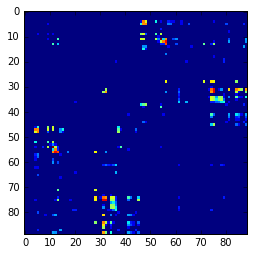

In [140]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.log1p(M), interpolation='nearest')

In [141]:
lr_superiorfrontal_track = grouping[11, 54]
shape = labels.shape
dm = utils.density_map(lr_superiorfrontal_track, shape, affine=affine)

In [136]:
labels = nib.load('gv.nii.gz')

cc_slice = labels == 2
cc_streamlines = utils.target(streamlines, cc_slice, affine=affine)
cc_streamlines = list(cc_streamlines)

other_streamlines = utils.target(streamlines, cc_slice, affine=affine,
                                 include=False)
other_streamlines = list(other_streamlines)
assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)

ValueError: streamlines points are outside of target_mask

In [52]:
labels.get_data()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

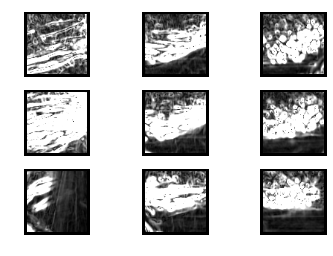

In [97]:
imgShow(data, vmax=1000)

In [129]:
#print data
datazero = np.nonzero(data)
print datazero

(array([ 0,  0,  0, ..., 80, 80, 80]), array([  2,   2,   2, ..., 105, 105, 105]), array([21, 21, 21, ..., 48, 48, 50]), array([2, 5, 7, ..., 7, 8, 6]))


In [95]:
ls

bmask.nii.gz       fiber_ang45.trk  streamlines.npy
dti_tracker.log    fiber_ang60.trk  streamlines.npz.npy
dtk_tensor.nii.gz  ga.nii.gz        tensor_rgb_upper.nii.gz
fiber_ang15.trk    gv.nii.gz
fiber_ang30.trk    smask.nii.gz


In [123]:
ro1 = imgRead('mask-roi1.nii.gz')
type(ro1)

SimpleITK.SimpleITK.Image

In [125]:
ro2 = nib.load('mask-roi1.nii.gz')
print ro2.get_data()[0]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [127]:
x = np.nonzero(ro2)
print x

(array([0]),)


In [99]:
data = imgRead('ga.nii.gz')
print type(data)

<class 'SimpleITK.SimpleITK.Image'>


In [134]:
dataga = nib.load('ga.nii.gz')
affine = dataga.get_affine()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  


In [ ]:
print type(img)
img = imgRead(img)

In [84]:
print data

[[[[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   ..., 
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   ..., 
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   ..., 
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]]

  ..., 
  [[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   ..., 
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   ..., 
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.]
   [ 0.  

In [107]:
from dipy.data import read_stanford_labels, fetch_stanford_t1, read_stanford_t1
from dipy.reconst import peaks, shm

hardi_img, gtab, labels_img = read_stanford_labels()
data = hardi_img.get_data()
labels = labels_img.get_data()

fetch_stanford_t1()
t1 = read_stanford_t1()
t1_data = t1.get_data()

Creating new folder /root/.dipy/stanford_hardi
Files successfully downloaded to /root/.dipy/stanford_hardi
Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/stanford_hardi 
Files successfully downloaded to /root/.dipy/stanford_hardi
Files successfully downloaded to /root/.dipy/stanford_hardi
Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/stanford_hardi 


In [110]:
white_matter = (labels == 1) | (labels == 2)
csamodel = shm.CsaOdfModel(gtab, 6)
csapeaks = peaks.peaks_from_model(model=csamodel,
                                  data=data,
                                  sphere=peaks.default_sphere,
                                  relative_peak_threshold=.8,
                                  min_separation_angle=45,
                                  mask=white_matter)

In [111]:
seeds = utils.seeds_from_mask(white_matter, density=2)
streamline_generator = EuDX(csapeaks.peak_values, csapeaks.peak_indices,
                            odf_vertices=peaks.default_sphere.vertices,
                            a_low=.05, step_sz=.5, seeds=seeds)
affine = streamline_generator.affine
streamlines = list(streamline_generator)